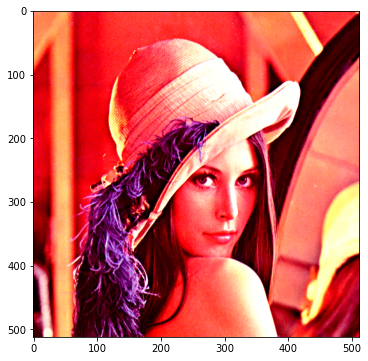

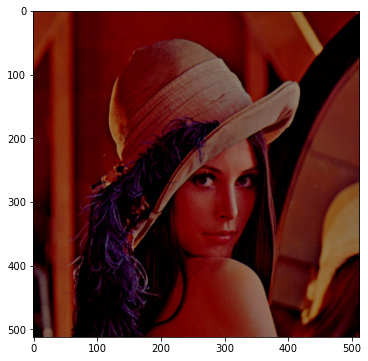

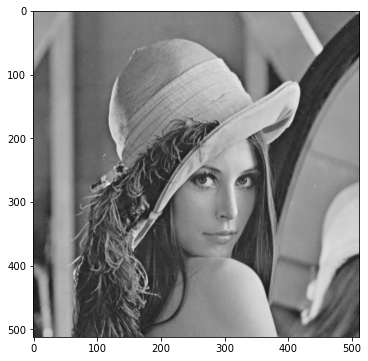

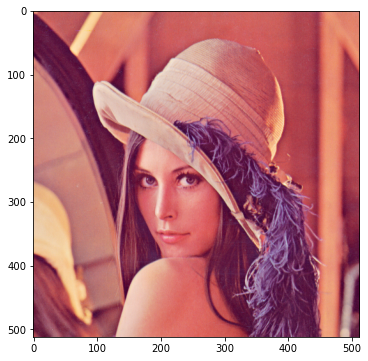

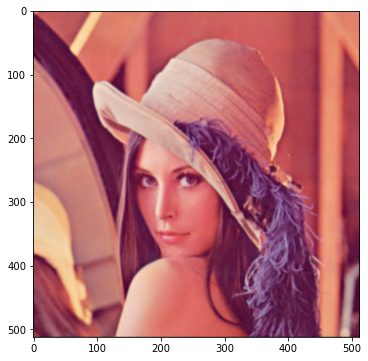

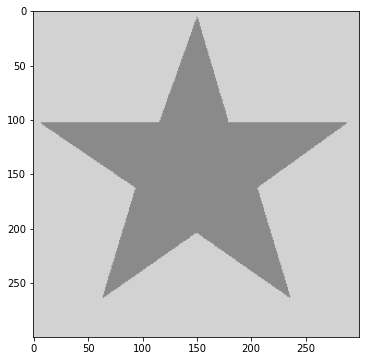

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_image(image):
    plt.figure(figsize=(12,6))
    plt.imshow(image)
    
def read_image_from_computer(path):
    image = Image.open(path)
    return image

def change_image_contrast(image, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        value = 128 + factor * (c - 128)
        return max(0, min(255, value))
    return image.point(contrast)

def change_image_brightness(image, level):
    def brightness(c):
        value = c + level
        return max(0, min(255, value))
    return image.point(brightness)

def change_image_grayscale(image):
    image = np.asarray(image)/255.0
    gray_image = np.zeros(image.shape)
    
    RED = np.array(image[:, :, 0])
    GREEN = np.array(image[:, :, 1])
    BLUE = np.array(image[:, :, 2])

    RED = (RED *.299)
    GREEN = (GREEN *.587)
    BLUE = (BLUE *.114)

    average = (RED + GREEN + BLUE)
    gray_image = image

    for i in range(3):
        gray_image[:,:,i] = average
    return gray_image  

def flip_image_horizontal_vertical(image):
    w, h = image.size
    for y in range(h):
        for x in range(w // 2):
            left = image.getpixel((x, y))
            right = image.getpixel((w - 1 - x, y))
            image.putpixel((w - 1 - x, y), left)
            image.putpixel((x, y), right)
    return image

def convolution(oldimage, kernel):
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
 
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

def image_blur_guassian(image, level):
    image = np.asarray(image)
    filter_size = 2 * int(4 * level + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(level**2)
            x2 = np.exp(-(x**2 + y**2)/(2* level**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))

def image_blending(image_1, image_2):
    buffer_1 = change_image_grayscale(image_1);
    buffer_2 = change_image_grayscale(image_2);
    alpha = 0.5
    rst = alpha*buffer_1 + (1-alpha)*buffer_2
    return rst

if __name__ == '__main__':
  
    image = read_image_from_computer('lena.png')

    contrast = change_image_contrast(image, 100)
    show_image(contrast)
    
    brightness = change_image_brightness(image, -100)
    show_image(brightness)
    
    grayscale = change_image_grayscale(image)
    show_image(grayscale)
    
    flipped = flip_image_horizontal_vertical(image)
    show_image(flipped)
    
    blurred = image_blur_guassian(image, 1)
    show_image(blurred)
    
    image_1 = read_image_from_computer('background.png')
    image_2 = read_image_from_computer('star.png')
    rst = image_blending(image_1, image_2)
    show_image(rst)
    